In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
gpvalues = np.arange(0,1.01, 0.01)
np.random.seed(42)
numtests=10
starts = np.random.randint(1, 10, numtests)
widths = np.random.randint(1,10, numtests)
ends = starts + widths

In [3]:
def point_from_gp_v1(gpvalue, xmin, xmax, warp=False):
    if warp:
        rng = np.log(xmax) - np.log(xmin)
        outvalue = np.exp(np.log(xmin) + gpvalue * rng)
        return np.clip(outvalue, xmin, xmax).astype(int)
    else:
        return int(xmin + (gpvalue * (xmax - xmin)))


In [12]:
def point_from_gp_v2(gpvalue, xmin, xmax, warp=False):
    if warp:
        rng = np.log(xmax-xmin+2)
        outvalue = np.exp(gpvalue * rng )
        return min(outvalue+xmin-1, xmax).astype(int)
    else:
        return int(np.floor(min(xmin + gpvalue * (xmax - xmin + 1), xmax)))


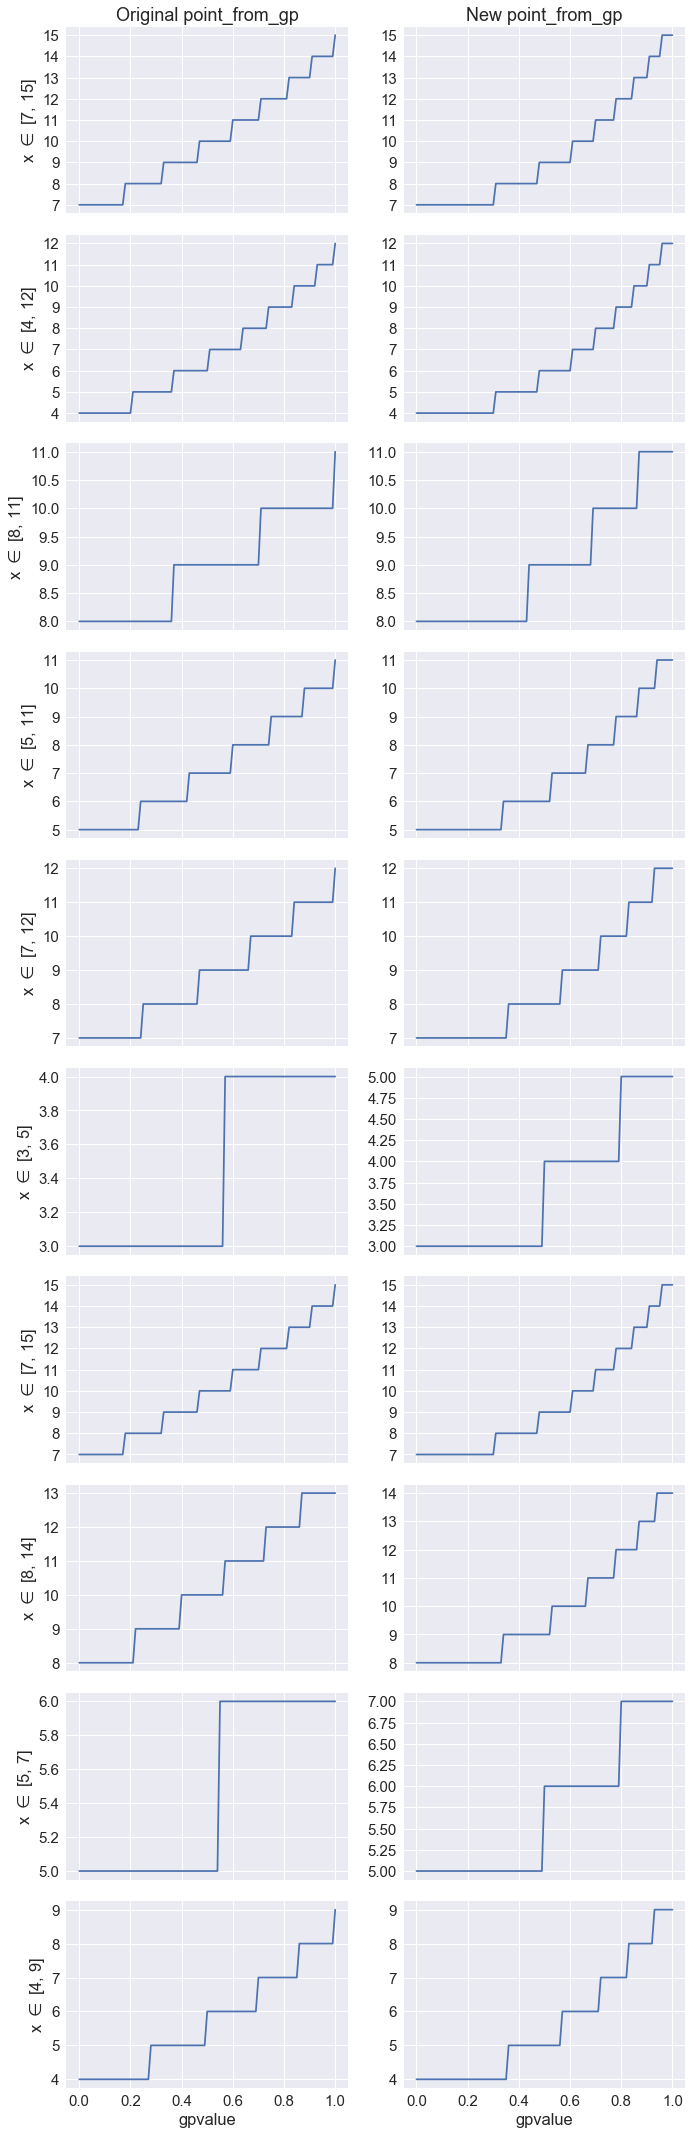

In [13]:
with sns.plotting_context('notebook', font_scale=1.5):
    fig, axes = plt.subplots(numtests, 2, sharex=True, figsize=(10,30))
    for i in range(numtests):
        x = gpvalues
        y1 = [point_from_gp_v1(gpvalue, starts[i], ends[i], warp=True) for gpvalue in gpvalues]
        y2 = [point_from_gp_v2(gpvalue, starts[i], ends[i], warp=True) for gpvalue in gpvalues]

        axes[i,0].plot(x, y1, label='[{0}, {1}]'.format(starts[i], ends[i]))
        axes[i,1].plot(x, y2, label='[{0}, {1}]'.format(starts[i], ends[i]))
        axes[i,0].set_ylabel('x $\in$ [{0}, {1}]'.format(starts[i], ends[i]))

    axes[numtests-1, 0].set_xlabel('gpvalue')
    axes[numtests-1, 1].set_xlabel('gpvalue')
    axes[0, 0].set_title('Original point_from_gp')
    axes[0, 1].set_title('New point_from_gp')


    plt.tight_layout()